In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from pyntcloud import PyntCloud
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
def show_bar_plots(hists: np.ndarray):
    n, m = hists.shape
    x = np.arange(m)
    for i, y in enumerate(hists):
        width = 1 / n
        shift = (i + 0.5) * width - 0.5
        plt.bar(x + shift, y, width=width, align='center')
    plt.show()

In [3]:
def show_distances(path, thr=1.5, k=0):
    df = pd.read_csv(path)
    dists = np.sort(df.values.flatten())[-k:]
    print('Number of good correspondences:', np.count_nonzero(dists < thr))
    plt.fill_between(np.arange(len(dists)), np.zeros_like(dists), dists, facecolor='blue', alpha=0.5)
    plt.hlines(thr, 0, len(dists) - 1, color='r')
    plt.show()

In [4]:
def show_uniquenesses(path, a_max=300):
    df = pd.read_csv(path)
    dists = df.values.flatten()
    dists = np.clip(np.sort(dists), a_min=0, a_max=a_max)
    plt.hist(dists, bins='fd')
    plt.show()

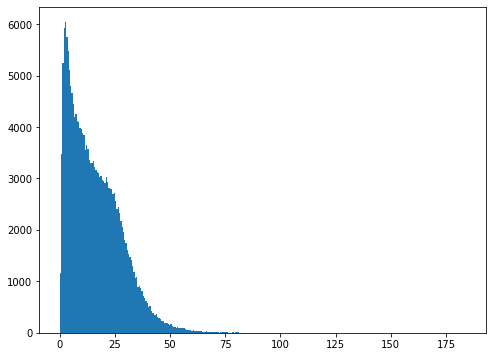

In [5]:
show_uniquenesses('data/debug/KilwaKisiwani_40r_KilwaKisiwani_43r_uniquenesses_src_random_01.csv')

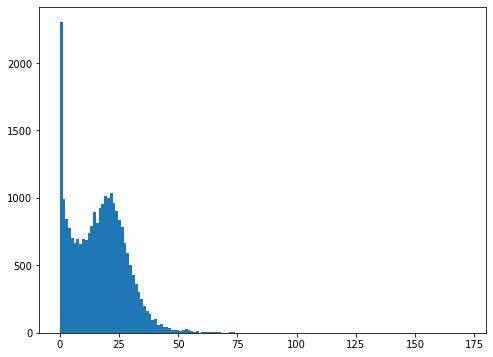

In [6]:
show_uniquenesses('data/debug/Hokuyo_4_Hokuyo_8_uniquenesses_src_random_01.csv')

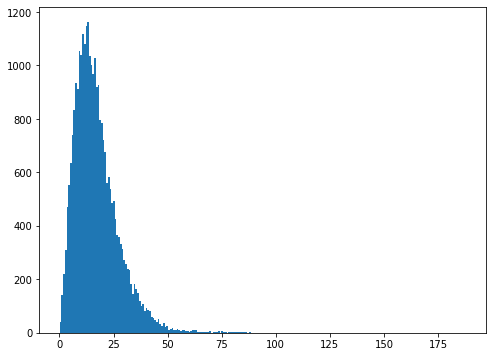

In [7]:
show_uniquenesses('data/debug/bun000_bun045_uniquenesses_src_random_01.csv')

In [8]:
def display_colored(df):
    display(df.style.background_gradient(subset=['pcc','t_err','r_err','pcd_err']))

In [9]:
columns=['version','testname','rmse','r_err','t_err','pcd_err','voxel_size','feature_radius_coef','pcc', 'correct_correspondences', 'correspondences','filter','threshold','n_random']

In [10]:
df = pd.read_csv('data/debug/test_results.csv')
df['pcc'] = df['correct_correspondences'] / df['correspondences']
df_bun = df[df['testname'] == 'bun000_bun045'][columns]
display_colored(df_bun)

,version,testname,rmse,r_err,t_err,pcd_err,voxel_size,feature_radius_coef,pcc,correct_correspondences,correspondences,filter,threshold,n_random
0,0,bun000_bun045,0.000695,nan,nan,nan,0.000800,5,0.171587,1546,9010,nan,nan,nan
2,1,bun000_bun045,0.000682,nan,nan,nan,0.000800,5,0.193088,1475,7639,nn,1.500000,nan
4,1,bun000_bun045,0.000687,nan,nan,nan,0.000800,5,0.211970,1229,5798,nn,5.000000,nan
6,1,bun000_bun045,0.000698,nan,nan,nan,0.000800,5,0.209440,1096,5233,random,10.000000,100.000000
8,1,bun000_bun045,0.000688,nan,nan,nan,0.000800,5,0.203123,1275,6277,random,8.000000,100.000000
10,1,bun000_bun045,0.000683,nan,nan,nan,0.000800,5,0.171641,1432,8343,mean,20.000000,nan
12,1,bun000_bun045,0.000710,nan,nan,nan,0.000800,5,0.211194,1098,5199,random,10.000000,100.000000
19,1,bun000_bun045,0.000692,nan,nan,nan,0.000800,5,0.203695,1268,6225,random,10.000000,50.000000
33,1,bun000_bun045,0.001607,0.012628,0.001168,0.000464,0.002000,5,0.564274,1014,1797,nan,nan,nan
34,1,bun000_bun045,0.000694,0.005842,0.000444,0.000316,0.000800,5,0.171587,1546,9010,nan,nan,nan


In [11]:
df_hokuyo = df[df['testname'] == 'Hokuyo_4_Hokuyo_8'][columns]
display_colored(df_hokuyo)

,version,testname,rmse,r_err,t_err,pcd_err,voxel_size,feature_radius_coef,pcc,correct_correspondences,correspondences,filter,threshold,n_random
1,0,Hokuyo_4_Hokuyo_8,0.058594,nan,nan,nan,0.060000,5,0.035059,174,4963,nan,nan,nan
3,1,Hokuyo_4_Hokuyo_8,0.058794,nan,nan,nan,0.060000,5,0.050031,163,3258,nn,1.500000,nan
5,1,Hokuyo_4_Hokuyo_8,0.059871,nan,nan,nan,0.060000,5,0.054937,148,2694,nn,5.000000,nan
7,1,Hokuyo_4_Hokuyo_8,0.059891,nan,nan,nan,0.060000,5,0.055280,145,2623,random,10.000000,100.000000
9,1,Hokuyo_4_Hokuyo_8,0.060995,nan,nan,nan,0.060000,5,0.052306,152,2906,random,8.000000,100.000000
11,1,Hokuyo_4_Hokuyo_8,0.059755,nan,nan,nan,0.060000,5,0.035398,172,4859,mean,20.000000,nan
13,1,Hokuyo_4_Hokuyo_8,0.060058,nan,nan,nan,0.060000,5,0.059832,157,2624,random,10.000000,100.000000
20,1,Hokuyo_4_Hokuyo_8,0.058367,nan,nan,nan,0.060000,5,0.052595,151,2871,random,10.000000,50.000000
38,2,Hokuyo_4_Hokuyo_8,0.055830,0.028844,0.042810,0.058706,0.060000,5,0.035059,174,4963,nan,nan,nan
40,2,Hokuyo_4_Hokuyo_8,0.058154,0.008860,0.037449,0.032490,0.060000,5,0.026721,130,4865,nan,nan,nan


In [12]:
df_kilwi_kisiwani = df[df['testname'] == 'KilwaKisiwani_40r_KilwaKisiwani_43r'][columns]
display_colored(df_kilwi_kisiwani)

/home/aleksandrina/PycharmProjects/env/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/aleksandrina/PycharmProjects/env/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,version,testname,rmse,r_err,t_err,pcd_err,voxel_size,feature_radius_coef,pcc,correct_correspondences,correspondences,filter,threshold,n_random
14,0,KilwaKisiwani_40r_KilwaKisiwani_43r,0.040812,nan,nan,nan,0.035000,5,0.004331,208,48023,nan,nan,nan
15,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.036593,nan,nan,nan,0.035000,5,0.005448,97,17806,random,10.000000,100.000000
16,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.033397,nan,nan,nan,0.035000,5,0.006621,138,20844,random,10.000000,50.000000
17,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.033226,nan,nan,nan,0.035000,5,0.005754,136,23637,nn,1.500000,nan
18,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.039587,nan,nan,nan,0.035000,5,0.003451,55,15936,nn,5.000000,nan
23,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.033268,nan,nan,nan,0.035000,5,0.006943,145,20883,random,10.000000,50.000000
24,0,KilwaKisiwani_40r_KilwaKisiwani_43r,0.017900,nan,nan,nan,0.020000,7,0.001807,217,120095,nan,nan,nan
25,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.021886,nan,nan,nan,0.020000,7,0.002770,160,57758,random,10.000000,50.000000
26,1,KilwaKisiwani_40r_KilwaKisiwani_43r,0.032460,nan,nan,nan,0.035000,5,0.006630,138,20815,random,10.000000,50.000000
27,0,KilwaKisiwani_40r_KilwaKisiwani_43r,0.034961,nan,nan,nan,0.035000,5,0.004331,208,48023,nan,nan,nan


In [13]:
df_kilwi_kisiwani = df[df['testname'] == 'KilwaKisiwani_39r_KilwaKisiwani_40r'][columns]
display_colored(df_kilwi_kisiwani)

,version,testname,rmse,r_err,t_err,pcd_err,voxel_size,feature_radius_coef,pcc,correct_correspondences,correspondences,filter,threshold,n_random
21,0,KilwaKisiwani_39r_KilwaKisiwani_40r,0.031370,nan,nan,nan,0.035000,5,0.015217,817,53690,nan,nan,nan
22,1,KilwaKisiwani_39r_KilwaKisiwani_40r,0.029737,nan,nan,nan,0.035000,5,0.026520,622,23454,random,10.000000,50.000000


In [14]:
def analyze_features(path_src, path_tgt):
    features_src = pd.read_csv(path_src)
    features_tgt = pd.read_csv(path_tgt)
    features_diff = features_src - features_tgt
    f1_diff = features_diff['f1']
    f2_diff = features_diff['f2']
    f3_diff = features_diff['f3']
    f4_diff = features_diff['f4']

    fs1 = f1_diff.values
    f1_std = np.std(fs1)
    print(f'f1: {np.count_nonzero(fs1 > f1_std) / len(fs1)}')

    fs2 = f2_diff.values
    f2_std = np.std(fs2)
    print(f'f2: {np.count_nonzero(fs2 > f2_std) / len(fs2)}')

    fs3 = f3_diff.values
    f3_std = np.std(fs3)
    print(f'f3: {np.count_nonzero(fs3 > f3_std) / len(fs3)}')

    plt.hist(f1_diff, bins='rice')
    plt.show()

    plt.hist(f2_diff, bins='rice')
    plt.show()

    plt.hist(f3_diff, bins='rice')
    plt.show()

In [15]:
hists_src = pd.read_csv("data/debug/kig_023_22_chair_kig_022_21_chair_histograms_src_02.csv", header=None, usecols=np.arange(33).tolist())
hists_tgt = pd.read_csv("data/debug/kig_023_22_chair_kig_022_21_chair_histograms_tgt_02.csv", header=None, usecols=np.arange(33).tolist())

In [16]:
id_src = 8732
id_tgt = 44091
chair_corner_src = hists_src.iloc[id_src]
chair_corner_tgt = hists_tgt.iloc[id_tgt]

In [60]:
point_ids = pd.read_csv('data/debug/kig_023_22_chair_kig_022_21_chair_ids_02.csv')
point_ids.set_index('id_src', drop=False, inplace=True)
display(point_ids)

,id_src,id_tgt,x_src,x_tgt,y_src,y_tgt,z_src,z_tgt
id_src,,,,,,,,
89,89,16122,-1.79652,-1.80416,-0.390360,-0.387864,-0.110651,-0.113627
130,130,2490,-1.81304,-1.81533,-0.203761,-0.208282,0.042092,0.037531
245,245,7053,-1.81351,-1.81686,-0.241386,-0.249652,0.042342,0.037571
254,254,639,-1.80610,-1.81386,-0.202471,-0.214776,-0.089605,-0.079248
289,289,54301,-1.82680,-1.83179,-0.407963,-0.412648,0.012342,0.012918
...,...,...,...,...,...,...,...,...
13784,13784,36808,-1.79353,-1.79237,-0.047694,-0.053874,-0.168724,-0.172955
13820,13820,39987,-1.79742,-1.80544,-0.102195,-0.108843,-0.073004,-0.073685
13878,13878,13794,-1.79537,-1.80285,-0.386314,-0.387057,-0.127218,-0.134102


In [61]:
point_ids_src = point_ids['id_src'].values
point_ids_tgt = point_ids['id_tgt'].values
ids_src = np.array([5994, 245, 1565, 5545])
ids_tgt = np.array([point_ids[point_ids['id_src'] == id_src]['id_tgt'].values[0] for id_src in ids_src])

In [64]:
display(point_ids.loc[ids_src])

,id_src,id_tgt,x_src,x_tgt,y_src,y_tgt,z_src,z_tgt
id_src,,,,,,,,
5994,5994,4426,-1.82056,-1.81917,-0.398876,-0.403461,0.022874,0.017399
245,245,7053,-1.81351,-1.81686,-0.241386,-0.249652,0.042342,0.037571
1565,1565,303,-1.81053,-1.81344,-0.244570,-0.248746,-0.031058,-0.039379
5545,5545,13787,-1.79320,-1.80169,-0.385808,-0.386865,-0.148848,-0.153550


In [46]:
def show_confusion_matrix(hists1, hists2, labels1=None, labels2=None):
    xx, yy = np.meshgrid(np.arange(len(hists1)), np.arange(len(hists2)))
    confusion_matrix = np.stack((hists1[xx], hists2[yy]), axis=2).min(axis=2).sum(axis=2)
    res = plt.imshow(confusion_matrix, cmap=plt.cm.jet, vmin=0, vmax=300, interpolation='nearest')
    plt.colorbar(res)
   
    if labels1 is not None: 
        plt.tick_params(labelbottom=False,labeltop=True)
        plt.xticks(range(len(hists1)), labels1)
    if labels2 is not None:
        plt.yticks(range(len(hists2)), labels2)
    plt.show()

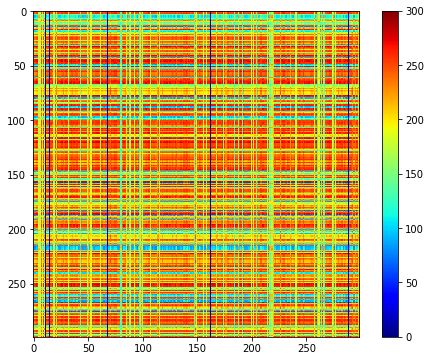

In [47]:
show_confusion_matrix(hists_src.iloc[point_ids_src].values, 
                      hists_tgt.iloc[point_ids_tgt].values) 

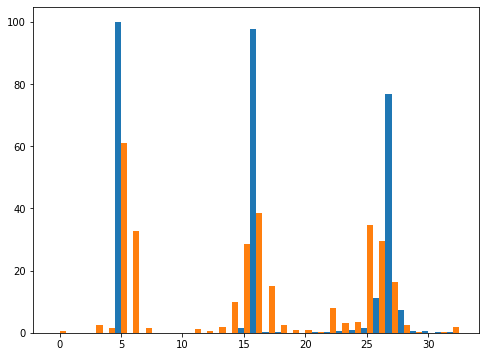

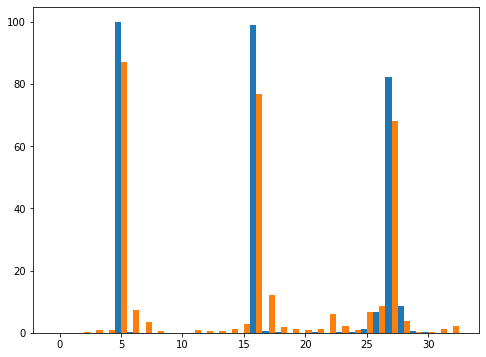

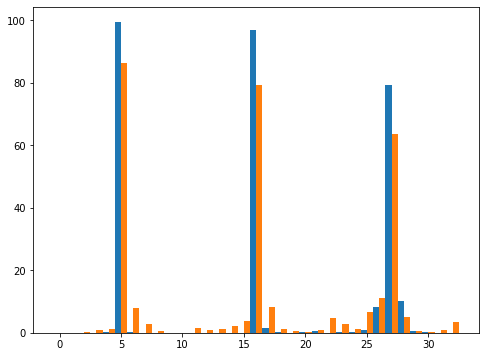

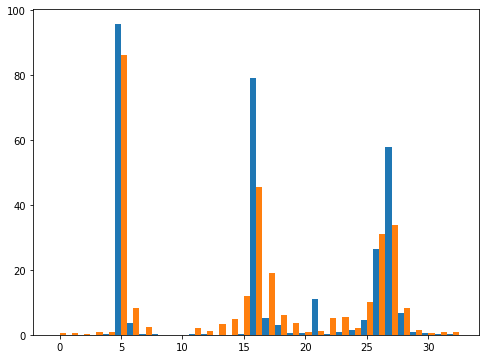

In [31]:
for id_src, id_tgt in zip(ids_src, ids_tgt):
    show_bar_plots(np.vstack((hists_src.iloc[id_src].values, hists_tgt.iloc[id_tgt].values)))

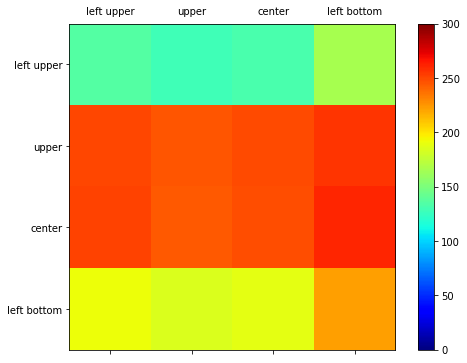

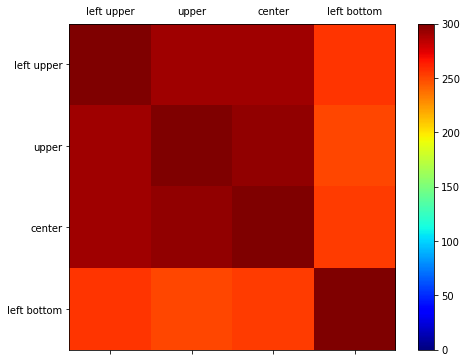

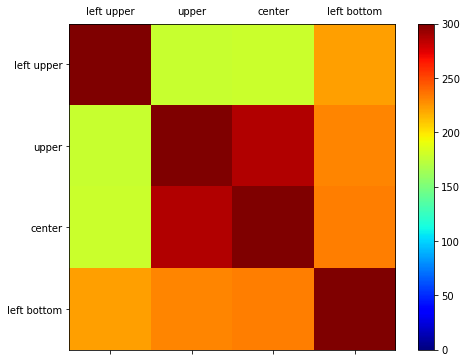

In [48]:
# 5994 - левый угол
# 245 - верх спинки
# 1565 - середина спинки
# 5545 - нижний угол

show_confusion_matrix(hists_src.iloc[ids_src].values, 
                      hists_tgt.iloc[ids_tgt].values,
                      ['left upper', 'upper', 'center', 'left bottom'],
                      ['left upper', 'upper', 'center', 'left bottom']) 
show_confusion_matrix(hists_src.iloc[ids_src].values, 
                      hists_src.iloc[ids_src].values,
                      ['left upper', 'upper', 'center', 'left bottom'],
                      ['left upper', 'upper', 'center', 'left bottom']) 
show_confusion_matrix(hists_tgt.iloc[ids_tgt].values, 
                      hists_tgt.iloc[ids_tgt].values,
                      ['left upper', 'upper', 'center', 'left bottom'],
                      ['left upper', 'upper', 'center', 'left bottom']) 